**TUGAS PRAKTIKUM - KUIS 2 PCVK**

KELOMPOK 8

Nama Anggota Kelompok :

1. Mirabell Joice Laura (2141720174)
2. M. Edwin Isa Alfais (2141720193)
3. Nabilah Amaalina Syafa (2141720198)

Silakan mengerjakan pertanyaan di bawah ini dengan benar dan jujur.

- Mengerjakan secara kelompok yang terdiri dari 3 anggota
- Kumpulkan e-ktp anggota keluarga pada kelompok minimal 10 buah sebagai dataset.
- deteksi dan kenali foto wajah e-ktp tersebut menggunakan metode yang telah dipelajari baik pada matakulilah PCVK ataupun matakuliah lain pada semester ini.
- Presentasikan di depan kelas hasil dari pekerjaan kelompok Anda, paparkan hasil dari pekerjaan tersebut secara detail lengkap dengan tangkapan layar bagian dari;

(1)pre-processing,

(2)lokalisasi,

(3)segmentasi, dan

(4)pengenalan.


jangan lupa upload juga kode program tersebut pada repository
kumpulkan link file presentasi dalam bentuk pdf dan link repository.
Selamat mengerjaan, semua anggota kelompok wajib saling berkontribusi.




In [1]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [16]:
import os
import cv2
import matplotlib.pyplot as plt

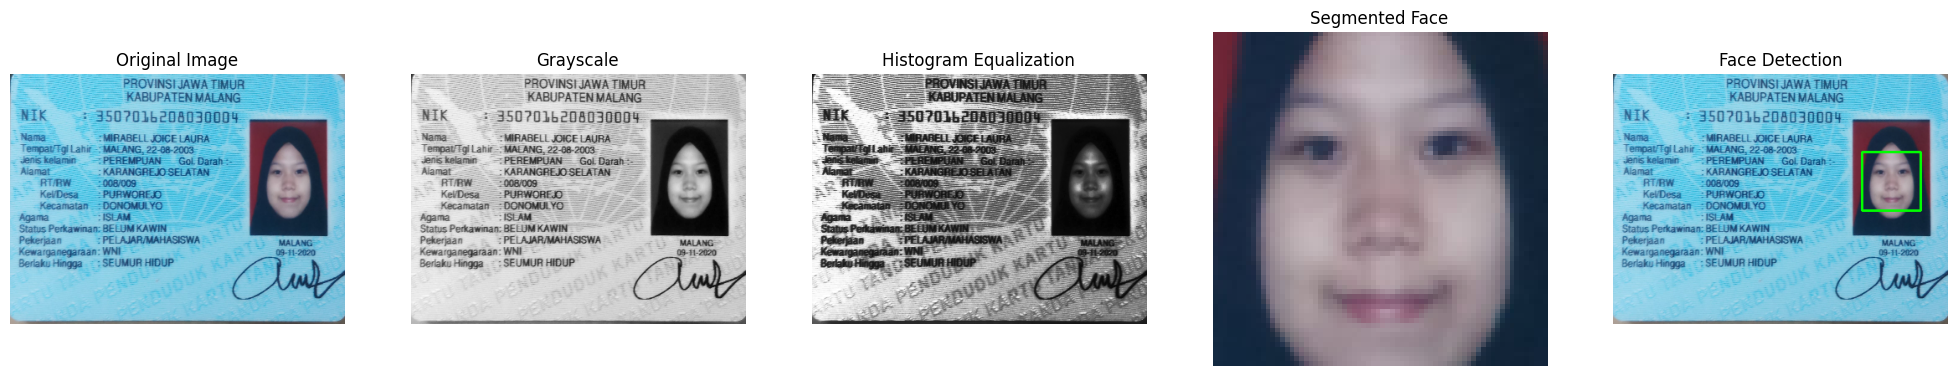

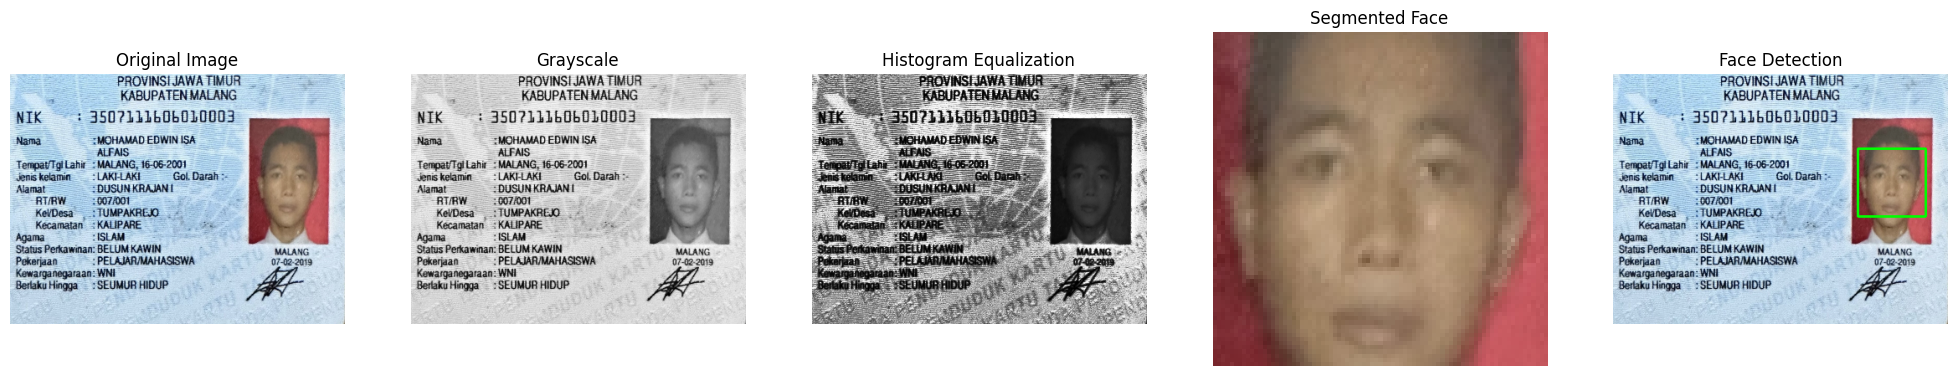

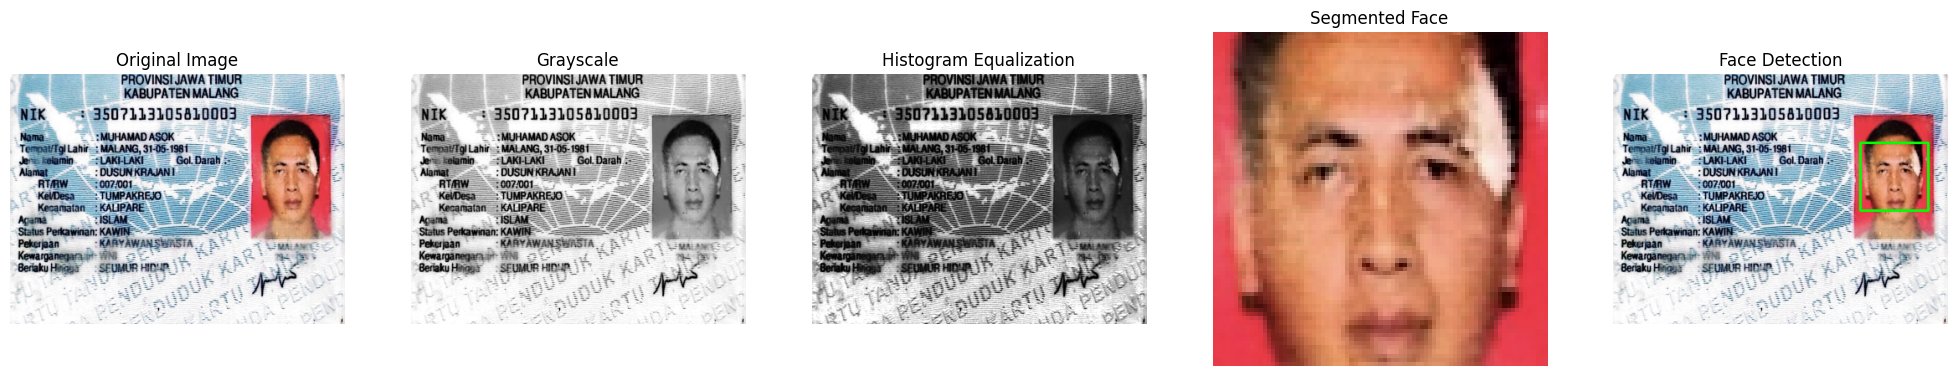

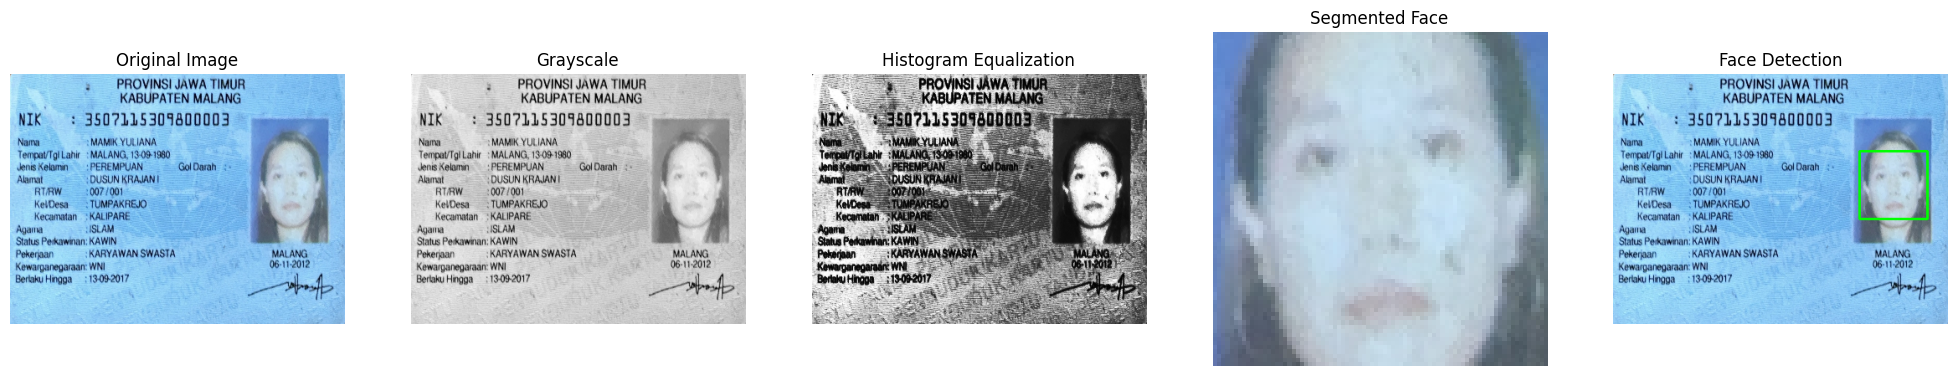

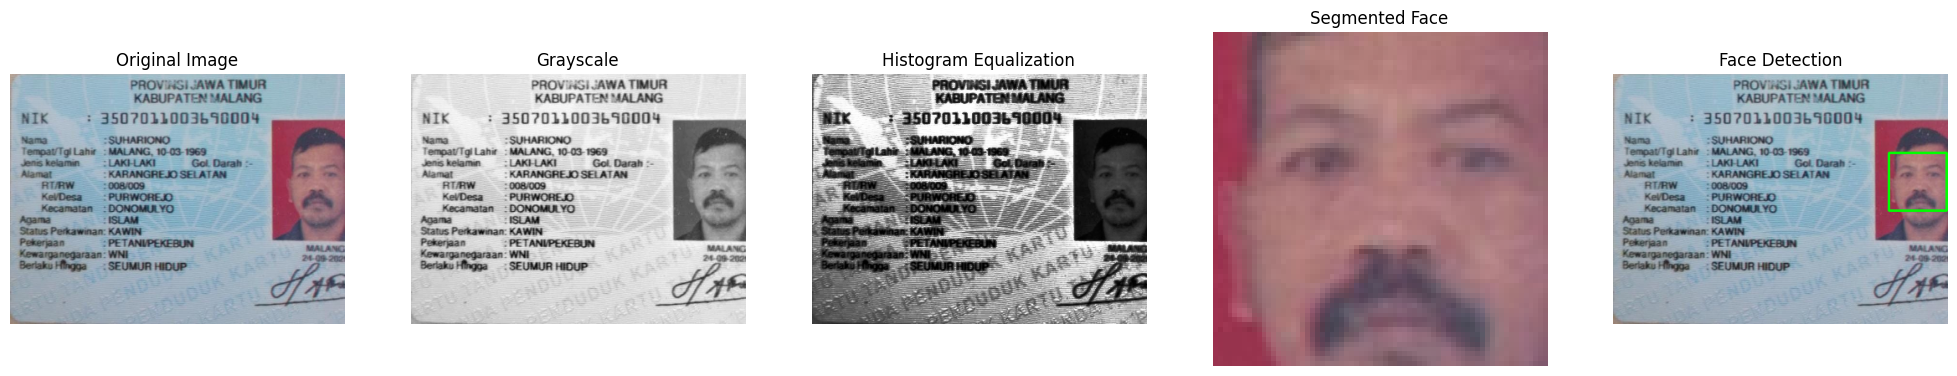

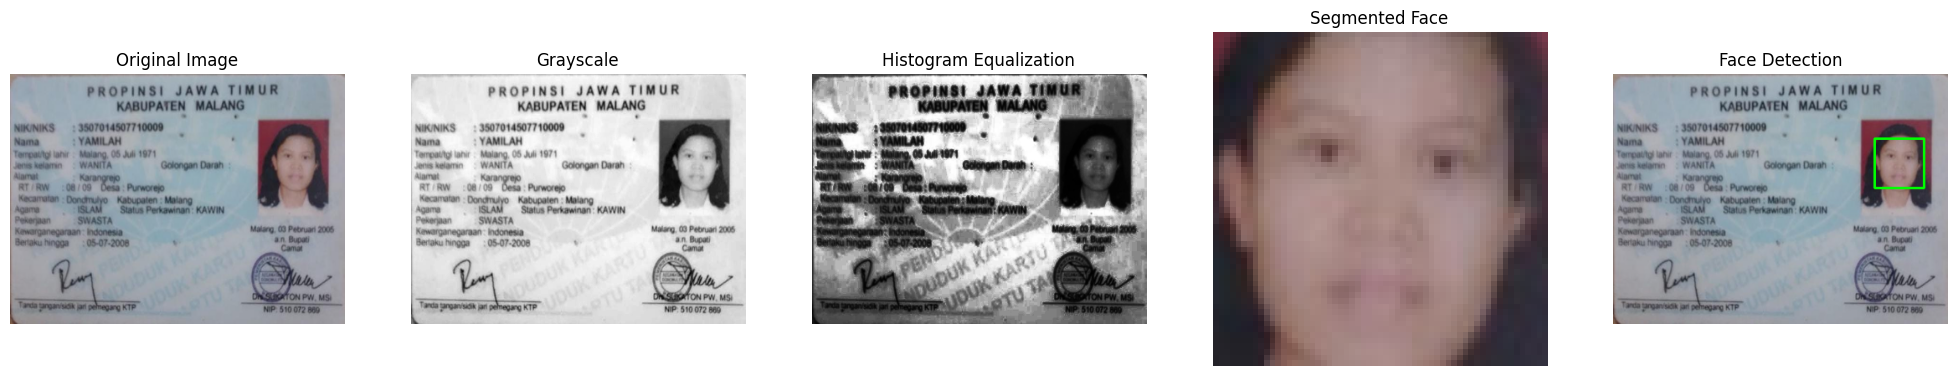

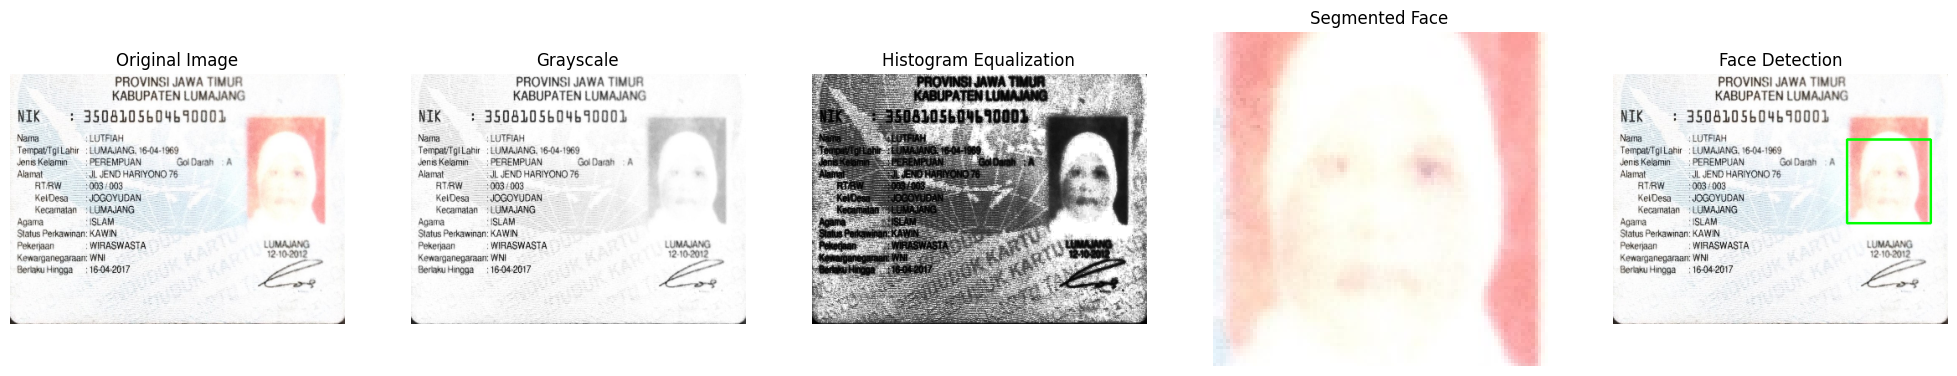

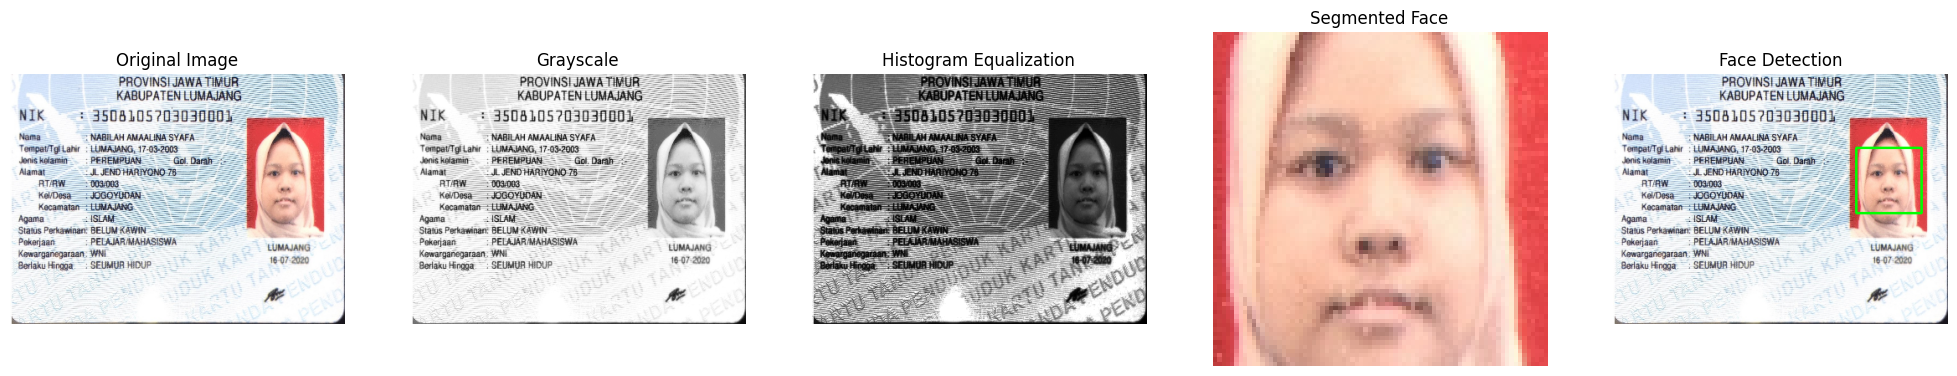

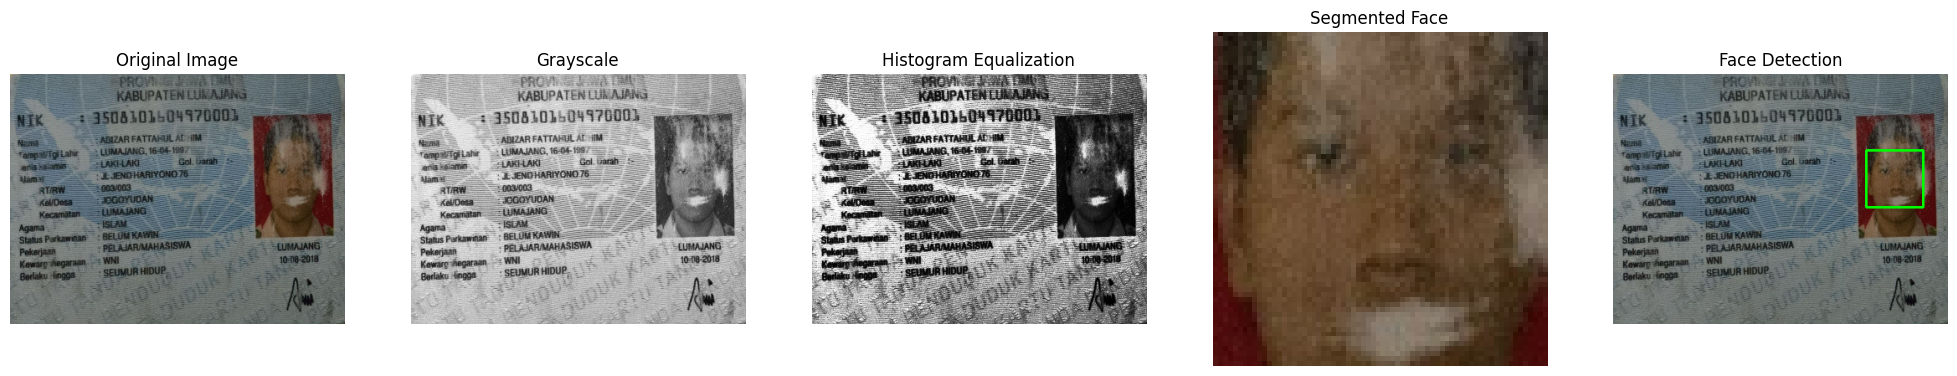

In [27]:
# Direktori tempat gambar-gambar berada
direct_data = '/content/MyDrive/MyDrive/PCVK/ktp_kel8'

# Menggunakan os.listdir untuk mengambil daftar file dalam direktori
files = os.listdir(direct_data)

# Load Haar Cascade classifier for face detection
cascade_wajah = cv2.CascadeClassifier('/content/MyDrive/MyDrive/PCVK/Face Detection/haarcascade_frontalface_alt.xml')

# Loop melalui semua gambar dalam direktori
for i, img_file in enumerate(files, start=1):
    img_path = os.path.join(direct_data, img_file)
    img = cv2.imread(img_path)

    # PREPROCESSING
    # (1) Resize the image
    img = cv2.resize(img, (400, 300))

    # (2) Convert to Grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # (3) Histogram Equalization
    equalized_img = cv2.equalizeHist(gray_img)

    # (4) Lokalisasi (Face Detection)
    faces = cascade_wajah.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # SEGEMENTASI DAN RECOGNIZATION
    for (x, y, w, h) in faces:
        # (5) Segmentasi (Crop Wajah)
        face_segment = img[y:y+h, x:x+w]

        # Tampilkan hasil segmentasi dan pengenalan wajah
        plt.figure(figsize=(25, 6))

        # Gambar asli
        plt.subplot(151)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        # Grayscale image (PREPROCESSING)
        plt.subplot(152)
        plt.imshow(gray_img, cmap='gray')
        plt.title('Grayscale')
        plt.axis('off')

        # Equalized Image (PREPROCESSING)
        plt.subplot(153)
        plt.imshow(equalized_img, cmap='gray')
        plt.title('Histogram Equalization')
        plt.axis('off')

        # Gambar Segmentasi Wajah
        plt.subplot(154)
        plt.imshow(cv2.cvtColor(face_segment, cv2.COLOR_BGR2RGB))
        plt.title('Segmented Face')
        plt.axis('off')

        # Gambar dengan kotak di sekitar wajah (Lokalisasi - Face Detection)
        img_with_boxes = img.copy()
        cv2.rectangle(img_with_boxes, (x, y), (x+w, y+h), (0, 255, 0), 2)
        plt.subplot(155)
        plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
        plt.title('Face Detection')
        plt.axis('off')

        plt.show()
